In [1]:
#set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import texthero as hero
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_colwidth = 100

import nltk
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [2]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Setting styles and aesthetics
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.max_columns =200
#pd.options.display.max_rows =30
#pd.options.display.float_format = '{:,.2f}'.format

In [5]:
#reads the dataset
df = pd.read_csv('clean_data.csv')
df.head()

,news_country,news_website,text,title,clean_text,clean_title,new_date,DayOfWeek,month_published,year_published
0,Qatar,aljazeera,Kenya locust threat: Fears second wave will be worse for harvests\n\nMoves to squash E Africa’s ...,Kenya locust threat: Fears second wave will be worse for harvests,kenya locust threat fears second wave will be worse for harvests moves to squash e africa’s wor...,kenya locust threat fears second wave will be worse for harvests,2020-10-04,Sunday,October,2020.0
1,Qatar,aljazeera,Billions of locusts swarming through East Africa could prove disastrous for a region still reeli...,East Africa locust outbreak sparks calls for international help,billions of locusts swarming through east africa could prove disastrous for a region still reeli...,east africa locust outbreak sparks calls for international help,2020-01-25,Saturday,January,2020.0
2,Qatar,aljazeera,"The UN says locusts in Ethiopia have damaged 200,000 hectares of cropland, as region braces for ...",Locust invasion creates food crisis for 1 million Ethiopians,the un says locusts in ethiopia have damaged 200 000 hectares of cropland as region braces for ...,locust invasion creates food crisis for 1 million ethiopians,2020-04-13,Monday,April,2020.0
3,Qatar,aljazeera,A serious outbreak of locusts is spreading in parts of East Africa and posing an “unprecedented”...,In Pictures: Locust outbreak spreads across East Africa,a serious outbreak of locusts is spreading in parts of east africa and posing an “unprecedented”...,in pictures locust outbreak spreads across east africa,2020-01-20,Monday,January,2020.0
4,Qatar,aljazeera,Uganda has scrambled to respond to the arrival of the biggest locust outbreak that parts of East...,In Pictures: Desert locusts swarm parts of East Africa,uganda has scrambled to respond to the arrival of the biggest locust outbreak that parts of east...,in pictures desert locusts swarm parts of east africa,2020-02-18,Tuesday,February,2020.0


In [6]:
df.shape

(621, 10)

#### 1.1 Article Title exploration and Analysis

In [7]:
df['clean_title']

0                                     kenya locust threat  fears second wave will be worse for harvests
1                                       east africa locust outbreak sparks calls for international help
2                                          locust invasion creates food crisis for 1 million ethiopians
3                                               in pictures  locust outbreak spreads across east africa
4                                                in pictures  desert locusts swarm parts of east africa
                                                     ...                                               
616                                    locust control operation well underway in north eastern counties
617    cs munya says egg laying locusts largely inactive  less destructive on vegetation » capital news
618                           seen any insect resembling a locust  send it to kiunjuri for verification
619                                              senate team wan

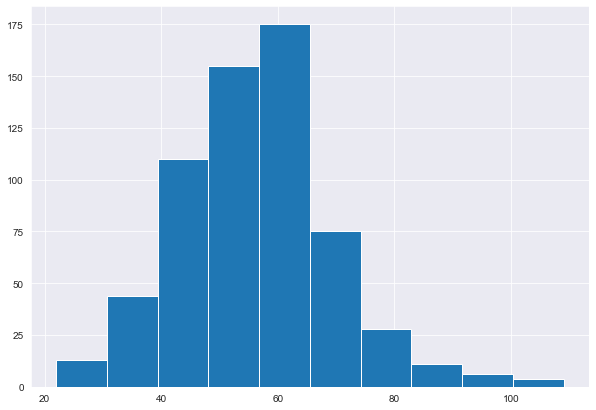

In [8]:
#plot of the title character length before cleaning
plt.figure(figsize=(10,7))
df['title'].str.len().hist()

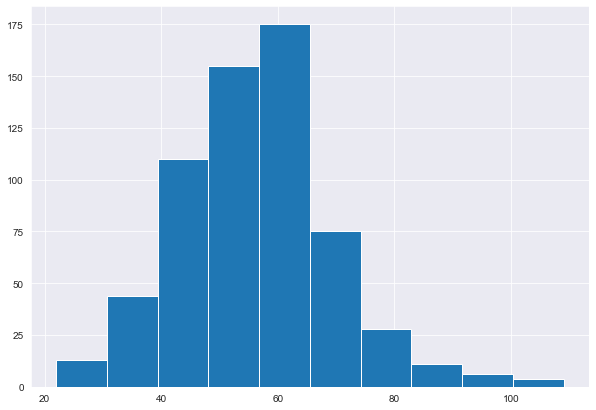

In [9]:
#plot of the title character length after cleaning
plt.figure(figsize=(10,7))
df['clean_title'].str.len().hist()

In [10]:
# mean character length
df['title'].str.len().mean()

56.19484702093398

In [11]:
#length of the longest title 
df['title'].str.len().max()

109

In [12]:
# length of the shortest title
df['title'].str.len().min()

22

In [13]:
#print the longest title
title_text = df['title']
longest_text = max(title_text, key=len)
print('length = ', len(longest_text))
print('\n',longest_text)

length =  109

 A swarm of locusts of biblical proportions is threatening the food supply of 20 million people in East Africa


In [14]:
#print the longest title
title_text = df['title']
shortest_text = min(title_text, key=len)
print('length = ', len(shortest_text))
print('\n',shortest_text)

length =  22

 Desert Locust invasion


##### Results and insights from Articles and Titles

News titles were normally distributed with an average of 56 characters per title. The characters range from 22 to 109 for raw titles. 

#### 1.2 NLP Analysis of Article Title

#### 1.2.1 Word Frequency

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#creates a corpus of the title
corpus=[]
df2= df['clean_title'].str.split()
df2=df2.values.tolist()
corpus=[word for i in df2 for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

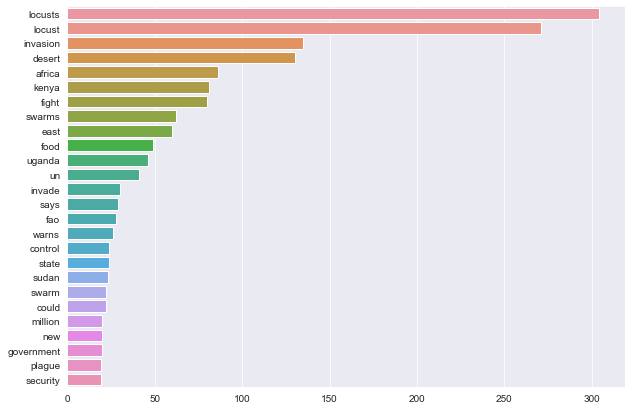

In [17]:
#counts the number of words/tokens on raw titles
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

#plots the number of words/tokens in the raw title
plt.figure(figsize=(10,7))
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

The figure above shows that the most used word in the news titles are locust. Looking keenly, the top five used word are _locusts, invasion, desert, Africa and fight_. And this speaks to what the news articles are about.

#### 1.2.2 N-gram Exploration of the Title

In [18]:
from nltk.util import ngrams

In [19]:
#Function to get the top n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

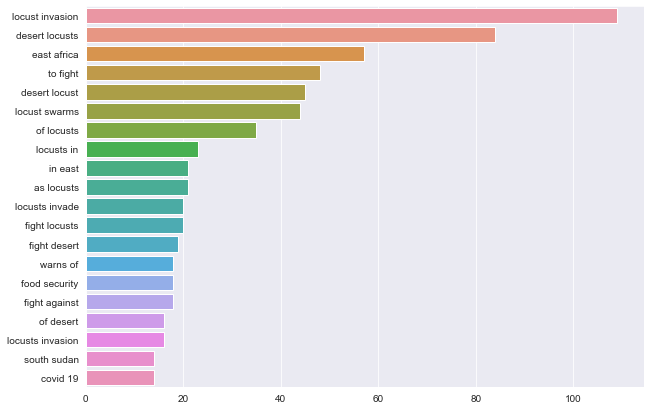

In [20]:
#Plots top 20 bi-grams
plt.figure(figsize=(10,7))
top_n_bigrams=get_top_ngram(df['clean_title'],2)[:20] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

Its interesting to see the top bi-grams of the titles. __Locust invasion__, __desert locusts__, __east africa__, __to fight__, __locust swarms__ are the top 5 bi-grams in this case. 

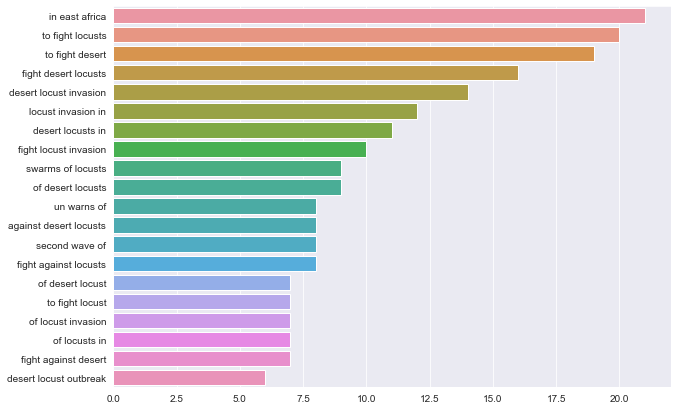

In [21]:
#plots top 20 tri-grams
plt.figure(figsize=(10,7))
top_tri_grams=get_top_ngram(df['clean_title'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

The top tri-grams for titles include, _in east africa, to fight locusts, to fight desert, fight desert locusts, and desert locust invasion_. The tri-grams point to the general theme or subject of the articles.

#### 1.2.3 Topic Modeling of the title

In [22]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
df['clean_title'].head()

0    kenya locust threat  fears second wave will be worse for harvests
1      east africa locust outbreak sparks calls for international help
2         locust invasion creates food crisis for 1 million ethiopians
3              in pictures  locust outbreak spreads across east africa
4               in pictures  desert locusts swarm parts of east africa
Name: clean_title, dtype: object

In [24]:
#Preprocessing text and creating a corpus

def preprocess_titles(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    
    for df in df['clean_title']:
        words=[w for w in word_tokenize(df) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_titles(df)

In [25]:
#!python -m pip install -U gensim

In [26]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [27]:
#Gives 5 topics
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 5, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.127*"locust" + 0.031*"invasion" + 0.028*"desert" + 0.025*"swarm" + 0.022*"uganda" + 0.021*"fight" + 0.015*"africa" + 0.014*"kenya" + 0.013*"food" + 0.010*"invade"'),
 (1,
  '0.101*"locust" + 0.049*"invasion" + 0.027*"africa" + 0.020*"desert" + 0.018*"east" + 0.014*"fight" + 0.012*"swarm" + 0.010*"fao" + 0.010*"crop" + 0.009*"brace"'),
 (2,
  '0.106*"locust" + 0.029*"kenya" + 0.027*"desert" + 0.022*"invasion" + 0.021*"say" + 0.016*"fao" + 0.016*"sudan" + 0.014*"swarm" + 0.012*"new" + 0.011*"face"'),
 (3,
  '0.041*"locust" + 0.014*"kenya" + 0.009*"swarm" + 0.009*"agriculture" + 0.009*"new" + 0.007*"crisis" + 0.007*"food" + 0.007*"youth" + 0.007*"head" + 0.007*"uganda"'),
 (4,
  '0.107*"locust" + 0.028*"desert" + 0.027*"africa" + 0.026*"east" + 0.024*"fight" + 0.017*"kenya" + 0.015*"food" + 0.015*"invasion" + 0.013*"county" + 0.009*"billion"')]

In [28]:
#!pip install pyldavis

In [29]:
import pyLDAvis.gensim

#visualizes the 10 topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.066348  0.007881       1        1  36.765112
4     -0.043923  0.049791       2        1  21.199518
2      0.029676 -0.126338       3        1  18.739378
1     -0.065667  0.016912       4        1  16.317840
3      0.146262  0.051754       5        1   6.978153, topic_info=         Term        Freq       Total Category  logprob  loglift
19   invasion  113.000000  113.000000  Default  30.0000  30.0000
10       east   48.000000   48.000000  Default  29.0000  29.0000
35     uganda   39.000000   39.000000  Default  28.0000  28.0000
8      africa   71.000000   71.000000  Default  27.0000  27.0000
75        say   26.000000   26.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
864  karamoja    1.502432   11.878147   Topic5  -5.2800   0.5948
18       food    2.122298   39.961820   Topic5  -4.9346  -0.2730
35     uganda    1.953400   39.651663   Topic5  -5.0175  -0.3482
325    expert    1.465986   14.049581   Topic5  -5.3046   0.4023
130      lead    1.011765    3.840297   Topic5  -5.6754   1.3285

[314 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
979       3  0.855564  accountability
21        2  0.841699          across
284       2  0.225317             act
284       4  0.450634             act
284       5  0.225317             act
...     ...       ...             ...
661       5  0.475070          yatani
163       1  0.141077            year
163       3  0.705385            year
454       2  0.281644           youth
454       5  0.563287           youth

[430 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

#### 1.2.4 Word Cloud for title

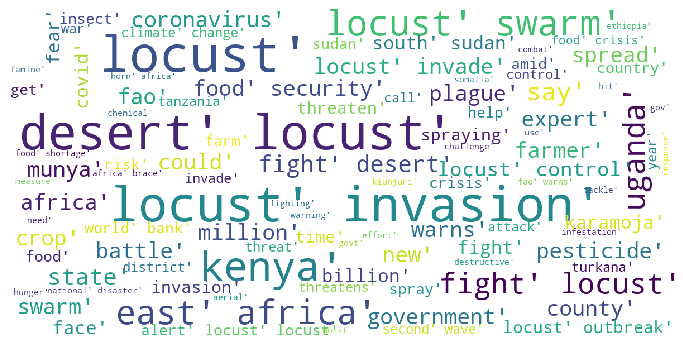

In [30]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

#### 1.2.5 Name Entity Recognition for title

In [31]:
#!pip install spacy

In [32]:
#!python -m spacy download en_core_web_sm

In [33]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [34]:
#Identify the entities in title corpus
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['clean_title'].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

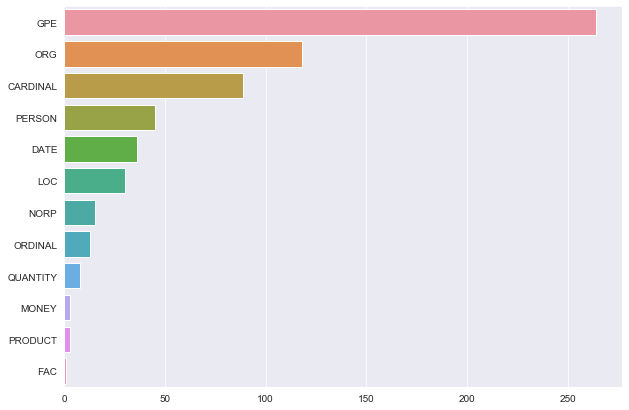

In [35]:
#visualize the frequencies of the entities
x,y=map(list,zip(*count))

plt.figure(figsize=(10,7))
sns.barplot(x=y,y=x)

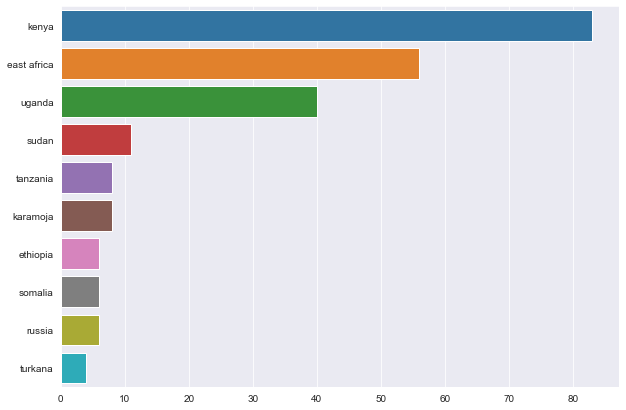

In [36]:
#Visualize the most common tokens per entity

def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df['clean_title'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

plt.figure(figsize=(10,7))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

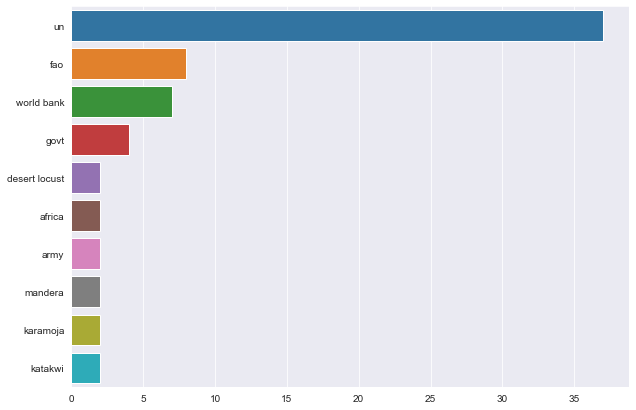

In [37]:
org=df['clean_title'].apply(lambda x: ner(x,"ORG"))
org=[i for x in org for i in x]
counter=Counter(org)

plt.figure(figsize=(10,7))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

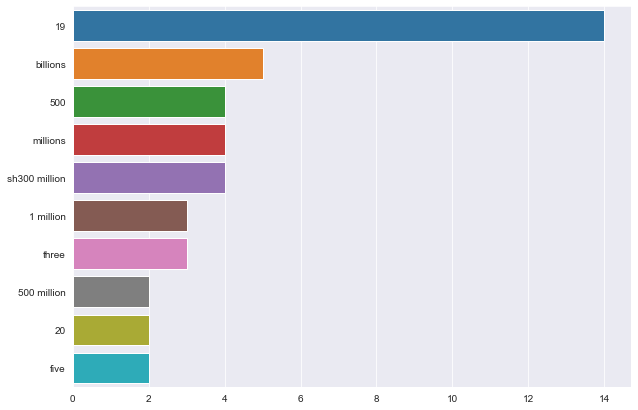

In [38]:
card=df['clean_title'].apply(lambda x: ner(x,"CARDINAL"))
card=[i for x in card for i in x]
counter=Counter(card)

plt.figure(figsize=(10,7))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

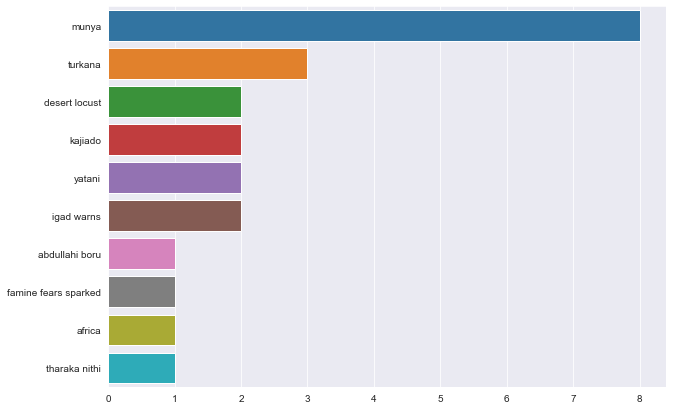

In [39]:
per=df['clean_title'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=Counter(per)

plt.figure(figsize=(10,7))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

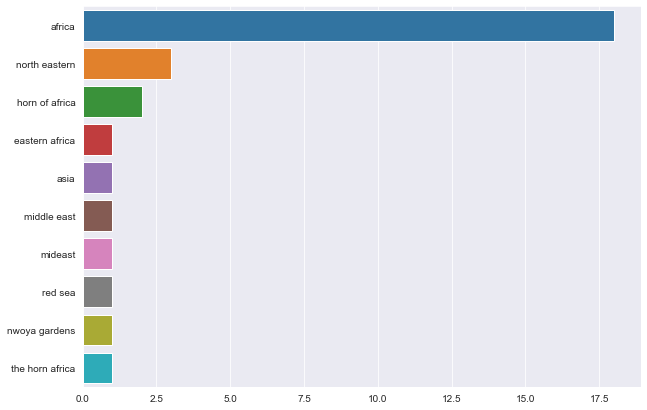

In [40]:
loc=df['clean_title'].apply(lambda x: ner(x,"LOC"))
loc=[i for x in loc for i in x]
counter=Counter(loc)

plt.figure(figsize=(10,7))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

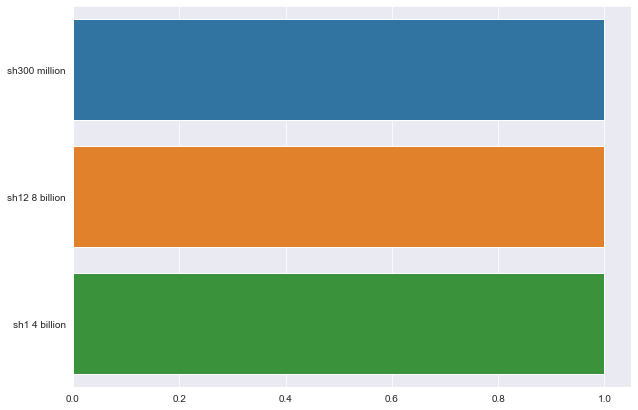

In [41]:
money=df['clean_title'].apply(lambda x: ner(x,"MONEY"))
money=[i for x in money for i in x]
counter=Counter(money)

plt.figure(figsize=(10,7))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

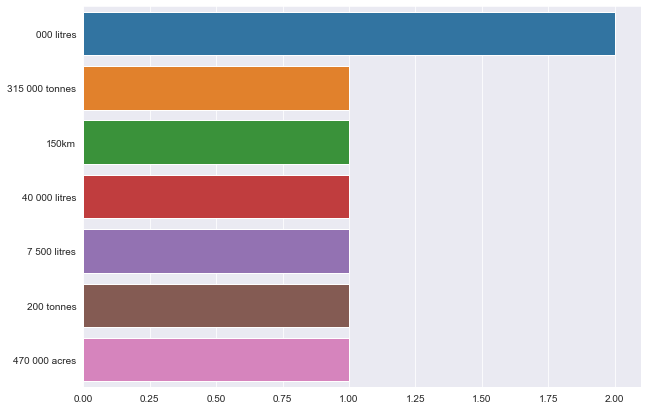

In [42]:
qty=df['clean_title'].apply(lambda x: ner(x,"QUANTITY"))
qty=[i for x in qty for i in x]
counter=Counter(qty)

plt.figure(figsize=(10,7))
x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

In [43]:
doc = nlp(df['title'][78])
[(x.text,x.label_) for x in doc.ents]

[('Japan', 'GPE'), ('$2.2', 'MONEY'), ('South Sudan', 'GPE')]

In [44]:
from spacy import displacy

displacy.render(doc, style='ent')

__Insights from Named Entity Recognition (NER)__

From the NER above, the model did'nt all the entities correctly. For example __desert locust__ has been identified as __ORG__. The model also didn't work well in the case of identifying __PERSON__ entities. In a separate notebook, I will train a custom NER model and comapre performance. 

Otherwise I have been able to identify some interesting entities that provide more information about the invasion. For instance, alot of money was spent in fighting the inavsion. This can be seen form __CARDINAL__ and __MONEY__ entities. 

#### 1.2.6 Parts of Speech Tagging

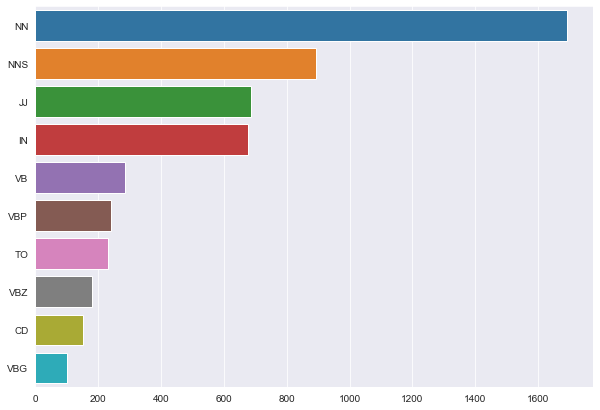

In [45]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df['clean_title'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

plt.figure(figsize=(10,7))
x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

Good reference for the POS tagset is here https://web.stanford.edu/~jurafsky/slp3/8.pdf 